This notebook presents a simulation of 5000 ms of 400 descending commands and 800 motoneurons from soleus. The force is prduced by a Hill-type muscle model. 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"


import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask

/home/renato/intel/intelpython27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
conf = Configuration('confMuscleHillExample.rmto')
conf.simDuration_ms = 5000 # Here I change simulation duration without changing the Configuration file.

In [3]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = NeuralTract(conf, 'CMExt')
ankle = jointAnkleForceTask(conf, pools)
Syn = SynapsesFactory(conf, pools)
del Syn

3586.0
Motor Unit Pool SOL built
Descending Command CMExt built
All the 96107 synapses were built


In [4]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
conf.simDuration_ms = 5000 # Here I change simulation duration without changing the Configuration file.

In [5]:
tic = time.clock()
for i in xrange(0,len(t)-1): 
    ankle.atualizeAnkle(t[i], 0.25*np.sin(2*np.pi*t[i]/1000.0)-0.1)
    pools[1].atualizePool(t[i])
    pools[0].atualizeMotorUnitPool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

11489.29027 seconds


In [6]:
pools[0].listSpikes()
pools[1].listSpikes()

The spike times of the MNs along the 5000 ms of simulation are shown in Fig. \ref{fig:spikesMNHill}.

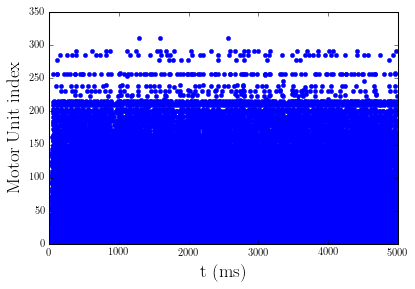

In [7]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
    pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

The muscle force produced by the Hill-type model is shown in Fig.\ref{fig:forceHill}.

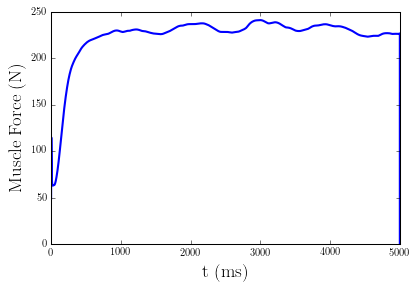

In [8]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

The muscle length computed with the Hill-type model is shown in Fig.\ref{fig:lengthHill}.

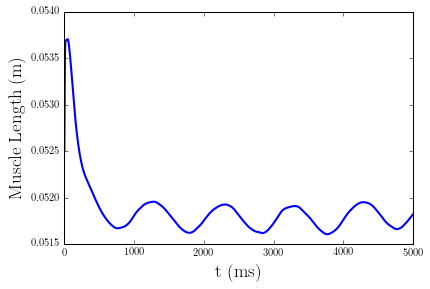

In [9]:
plt.figure()
plt.plot(t, pools[0].Muscle.length_m, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Length (m)')

The muscle velocity, computed by the Hill-type muscle model, is in Fig.\ref{fig:velocityHill}.

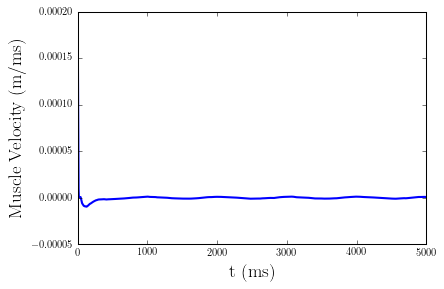

In [10]:
plt.figure()
plt.plot(t, pools[0].Muscle.velocity_m_ms, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Velocity (m/ms)')

The ankle joint angle is shown in Fig. \ref{fig:ankleAngleHill}.

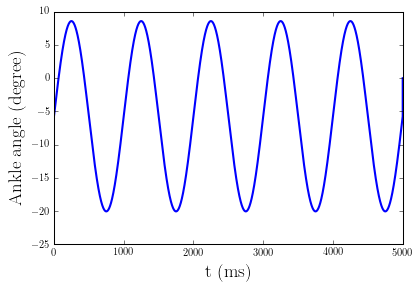

In [11]:
plt.figure()
plt.plot(t, ankle.ankleAngle_rad*180.0/np.pi, '-')
plt.xlabel('t (ms)')
plt.ylabel('Ankle angle (degree)')